In [12]:
%pylab inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score

from deep_learning.layers import Layer, InputLayer
from deep_learning.models import Model


import matplotlib.pyplot as plt


raw_data = pd.read_csv('examples/insurance_prediction/insurance.csv')

# Preprocessing
bmi_scaler = MinMaxScaler()
raw_data[['bmi']] = bmi_scaler.fit_transform(raw_data[['bmi']].values)
raw_data['sex'] = raw_data['sex'].apply({'male': 1, 'female': 0}.get)
raw_data['smoker'] = raw_data['smoker'].apply({'yes': 1, 'no': 0}.get)

# Region
onehot_smokers = pd.get_dummies(raw_data['region'], prefix='region')
raw_data = pd.concat([raw_data, onehot_smokers], axis=1)
# raw_data = raw_data.drop('region', axis=1)

# Y Labels
expense_scaler = StandardScaler()
raw_data['expenses'] = expense_scaler.fit_transform(raw_data[['expenses']].values)
data_y = raw_data.as_matrix(['expenses'])

# X Labels
data_x = raw_data.drop(['expenses', 'region'], axis=1)
data_x = data_x.as_matrix()
data_scaler = StandardScaler()
data_x = data_scaler.fit_transform(data_x)

# Split data into train and examples subset
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3)

# print('[TRAIN]')
# print('train_x:', train_x.shape)
# print('train_y:', train_y.shape)
# print('\n[TEST]')
# print('test_x:', test_x.shape)
# print('test_y:', test_y.shape)

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.DataFrame(data_y).describe()

,0
count,1.338000e+03
mean,-8.762298e-17
std,1.000374e+00
min,-1.003558e+00
25%,-7.046504e-01
50%,-3.212091e-01
75%,2.783443e-01
max,4.171663e+00


In [3]:
model = Model()
model.add(InputLayer(9, 32, activation='sigmoid', batch_input_shape=(None, 9), name='input_layer'))
model.add(Layer(32, 16, activation='sigmoid', name='hidden_layer'))
model.add(Layer(16, 1, name='output_layer'))
model.compile(optimizer='rmsprop', loss='mean_squared_error')

In [18]:
model.fit(data_x, data_y, epochs=500, learning_rate=0.0005)

epoch: 0 loss: 1.58247523432
epoch: 1 loss: 0.391374623436
epoch: 2 loss: 1.09249132279
epoch: 3 loss: -3.00381585397
epoch: 4 loss: 2.1172104328
epoch: 5 loss: -1.20219587161
epoch: 6 loss: 3.75365164351
epoch: 7 loss: 2.04932465249
epoch: 8 loss: 2.28186002996
epoch: 9 loss: 3.90739642975
epoch: 10 loss: 1.18266399614
epoch: 11 loss: 4.91747840269
epoch: 12 loss: -1.15586267317
epoch: 13 loss: 0.584103373776
epoch: 14 loss: 1.42452898949
epoch: 15 loss: 3.1334216992
epoch: 16 loss: 3.09975596706
epoch: 17 loss: 2.24633444467
epoch: 18 loss: 3.22614948913
epoch: 19 loss: 1.35362456684
epoch: 20 loss: 4.58572573106
epoch: 21 loss: 0.914021597851
epoch: 22 loss: 2.25829955843
epoch: 23 loss: 3.26990220711
epoch: 24 loss: 1.70497457808
epoch: 25 loss: 3.12837777477
epoch: 26 loss: 3.86260592397
epoch: 27 loss: 2.59903243864
epoch: 28 loss: 5.23496951233
epoch: 29 loss: 1.55731879771
epoch: 30 loss: 2.3782050494
epoch: 31 loss: 2.0007267059
epoch: 32 loss: 0.112681733149
epoch: 33 loss: 3

In [7]:
print(data_y[2:4])
model.predict(data_x[2:4])

[[-0.72867485]
 [ 0.71984291]]


array([[-0.60885655],
       [-0.26783404]])

[[-0.75459406]
 [-0.49975296]
 [-0.3467673 ]
 [-0.1378455 ]
 [-0.32566127]
 [-0.22283935]
 [-0.92145684]
 [ 1.60836016]
 [-0.0122725 ]
 [-0.02564799]]
[[-0.81594768]
 [-0.50475734]
 [-0.23413539]
 [-0.40121998]
 [-0.26037804]
 [-0.05297205]
 [-0.89263689]
 [ 0.87706008]
 [-0.1573231 ]
 [-0.22047959]]
[[  4135.69539801]
 [  7220.67051321]
 [  9072.63611192]
 [ 11601.7357884 ]
 [  9328.13477727]
 [ 10572.84406238]
 [  2115.74047963]
 [ 32740.40220016]
 [ 13121.85789553]
 [ 12959.94108767]]
[[  3392.98]
 [  7160.09]
 [ 10436.1 ]
 [  8413.46]
 [ 10118.42]
 [ 12629.17]
 [  2464.62]
 [ 23887.66]
 [ 11365.95]
 [ 10601.41]]


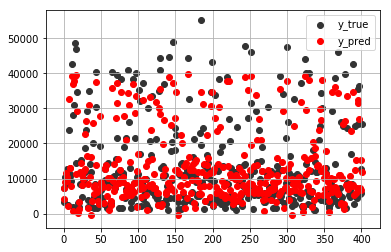

In [19]:
y_pred = model.predict(test_x)
print(y_pred[:10])
print(test_y[:10])
y_pred = expense_scaler.inverse_transform(y_pred)
y_true = expense_scaler.inverse_transform(test_y)
N = len(y_pred)
x = list(range(N))

print(y_pred[:10])
print(y_true[:10])


plt.scatter(x, y_true, color='#333333', label='y_true')
plt.scatter(x, y_pred, color='red', label='y_pred')
plt.grid()
plt.legend()

Accuracy (R Score): 0.760933932496


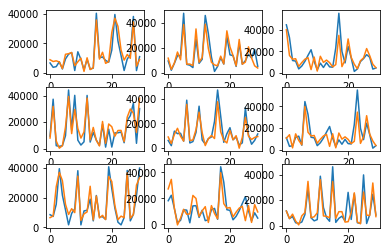

In [21]:
y_pred = model.predict(test_x)
y_pred = expense_scaler.inverse_transform(y_pred)
y_true = expense_scaler.inverse_transform(test_y)

print('Accuracy (R Score):', r2_score(y_true, y_pred))

fg, _plots = subplots(3, 3)
N = len(y_pred)
rng = 30

for p in _plots.flatten():
    idx = np.random.randint(0, N-rng)
    
    p.plot(y_true[idx:idx+rng])
    p.plot(y_pred[idx:idx+rng])